# Importing Necessary Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Importing the dataset

In [9]:
df = pd.read_csv("dataframe_.csv")

In [10]:
df.shape

(1697, 2)

# Exploratory Data Analysis

In [11]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Here the maximum value is way bigger than the mean

## Removing the null values and handling the outliers

In [12]:
df.isnull().sum()

input     1
output    1
dtype: int64

We can see that there are some missing values in **x1** and **x2** feature. So let's impute these missing values.

In [13]:
df1 = df.fillna(df.median())
df1.isnull().sum()

input     0
output    0
dtype: int64

In [14]:
df1.describe()

,input,output
count,1697.000000,1697.000000
mean,1.165257,-34.097671
std,78.982979,65.752922
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Let's check if thers are any outliers using **boxplots**

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input'>

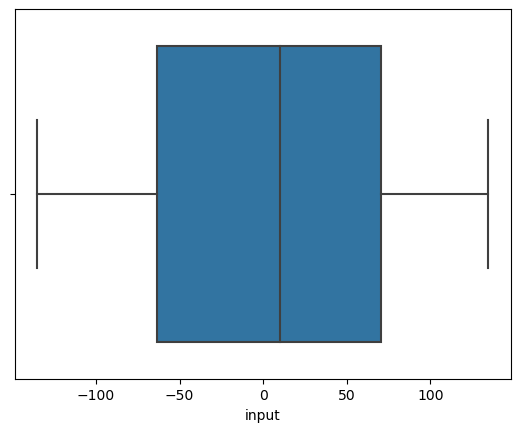

In [15]:
sns.boxplot(df1['input'])

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

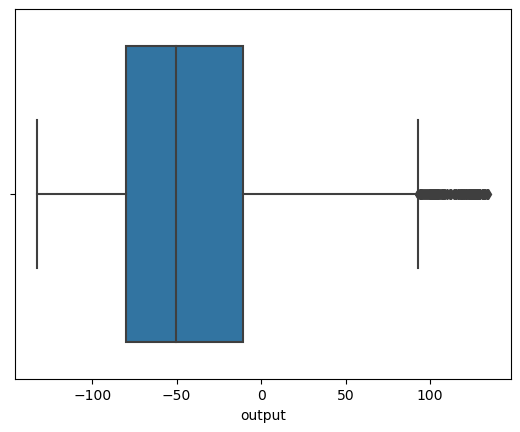

In [16]:
sns.boxplot(df1['output'])

Here we can see that there are outliers. So let us remove them.

In [17]:
df1['output'].quantile(0.999)

133.7931158

In [18]:
df2 = df1[df1['output'] <= 135]

In [19]:
df2.describe()

,input,output
count,1697.000000,1697.000000
mean,1.165257,-34.097671
std,78.982979,65.752922
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Let's check for outliers using boxplots

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input'>

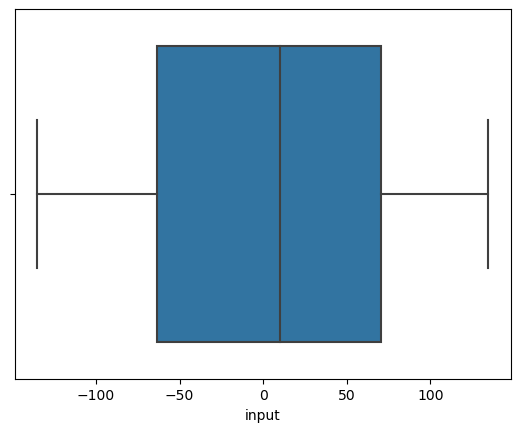

In [20]:
sns.boxplot(df2['input'])

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

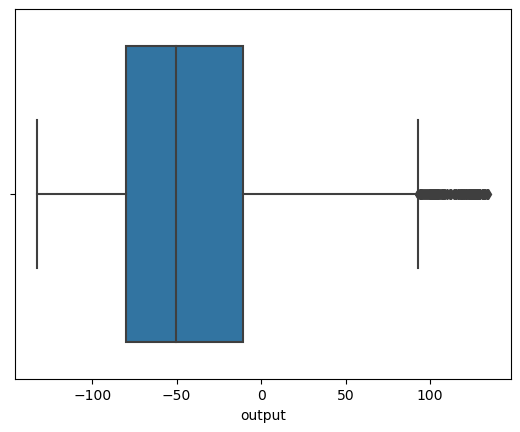

In [21]:
sns.boxplot(df2['output'])

we can see that there are no outliers in the data set

<AxesSubplot:xlabel='input', ylabel='output'>

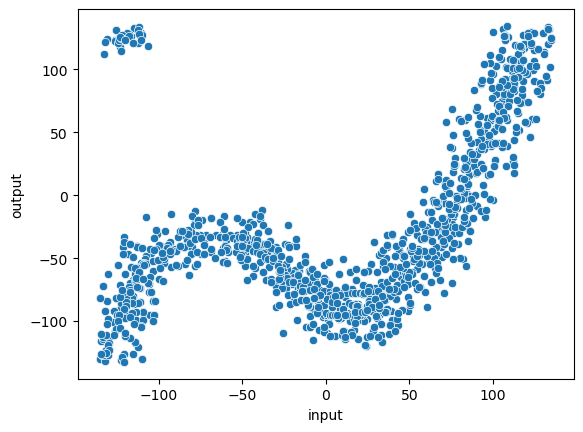

In [22]:
sns.scatterplot(x=df2['input'], y=df2['output'])

# Data preprocessing for Model training and evaluation

In [23]:
X = df2.drop(columns=['output'])
y = df2['output']

In [24]:
y.count

<bound method Series.count of 0      -130.572085
1      -129.938929
2      -130.141832
3      -125.760932
4      -112.785214
           ...    
1692    -76.380902
1693    -82.796934
1694    -87.000000
1695   -104.943052
1696   -101.726894
Name: output, Length: 1697, dtype: float64>

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

[0.40563606]
-34.85541363149856


,Coeff
input,0.405636


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


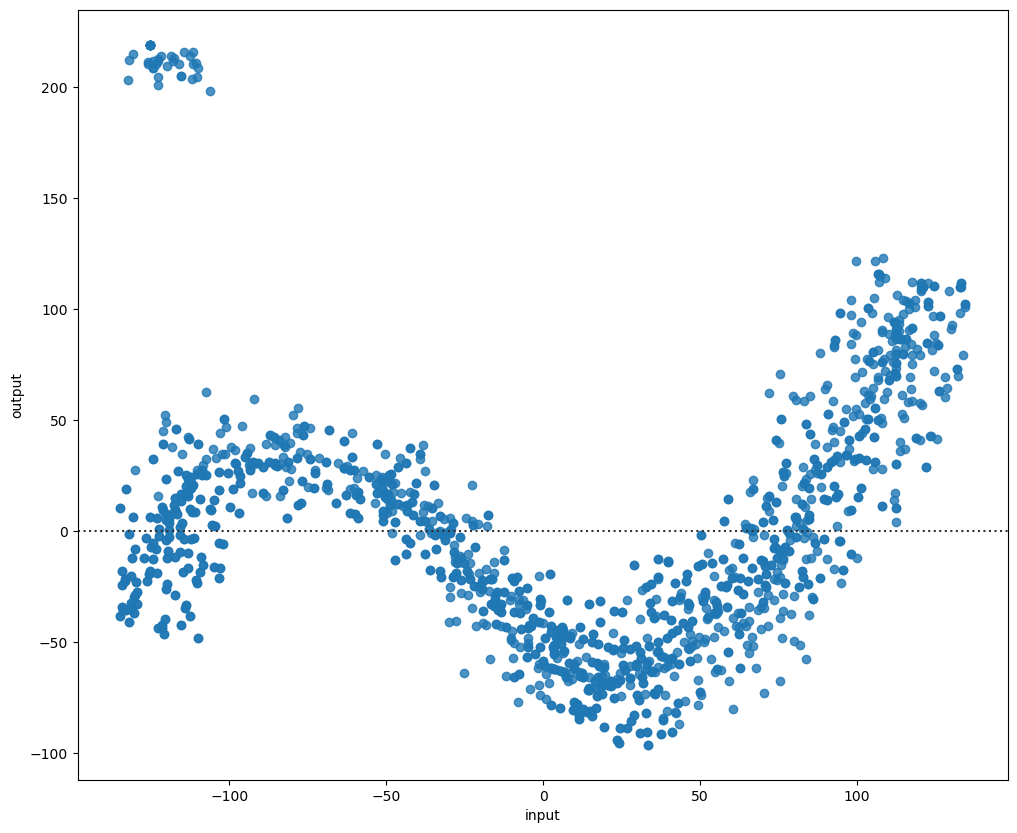

In [28]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['input'], df['output'])
plt.show()

<h2>Part 3: Polynomial Regression and Pipelines</h2>

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

In [29]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('output')

    plt.show()
    plt.close()

In [30]:
x = df1['input']
y = df1['output']

In [31]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3            2
6.003e-05 x + 0.006996 x - 0.1565 x - 72.85


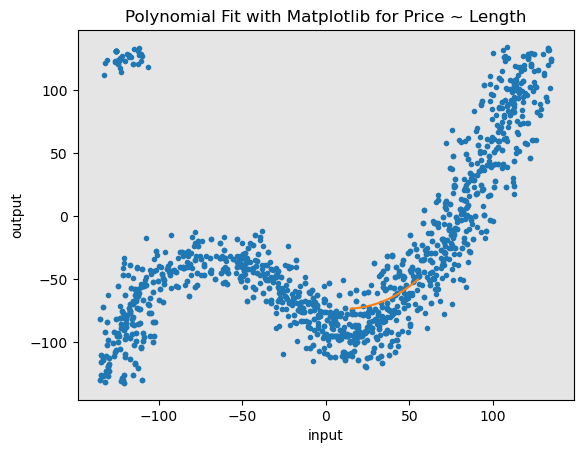

In [32]:
PlotPolly(p, x, y, 'input')

In [33]:
np.polyfit(x, y, 3)

array([ 6.00273487e-05,  6.99626477e-03, -1.56462282e-01, -7.28458175e+01])

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [35]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.655077594562357


Support Vector Machines with linear kernel

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
dc=DecisionTreeRegressor()
dc

DecisionTreeRegressor()

In [51]:
X=df['input']
Y=df['output']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [57]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [58]:
ml=MLPRegressor()
ml

MLPRegressor()

In [60]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [61]:
ml=MLPRegressor()
ml

MLPRegressor()

In [62]:
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[0:5])
regr.score(X_test, y_test)

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4162338898076594

## Evaluation
- Out of all the Three models, Linear Regression, Polynomial Regression and Neural Network.
- Polynomial Regression scored the highest.